<a href="https://colab.research.google.com/github/Jacqueline-Lim/HeartDiseasePrediction/blob/main/(SE)_Assign1_Jacqueline_Lim_Siao_Ching_2204538_(Colab_Notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/Assignment/HeartAssign2.csv')

In [ ]:
#EDA --> understanding the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1027.000000,1027.000000,1027.000000,1026.000000,1026.000000,1026.000000,1026.000000,1027.000000,1026.000000,1027.000000,1027.000000,1027.000000,1025.000000
mean,54.468657,0.692308,0.942551,132.247322,245.877193,0.149123,0.531189,149.798246,0.336904,1.107797,1.388510,0.749757,2.319377,0.513171
std,9.075495,0.461763,1.031478,27.240879,51.514152,0.356383,0.527767,29.624565,0.472882,1.781657,0.619678,1.026305,0.619095,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.017100,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.052100,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.038500,1.000000,3.000000,800.000000,564.000000,1.000000,2.000000,746.000000,1.000000,44.000000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1027 non-null   int64  
 2   cp        1027 non-null   int64  
 3   trestbps  1027 non-null   int64  
 4   chol      1026 non-null   float64
 5   fbs       1026 non-null   float64
 6   restecg   1026 non-null   float64
 7   thalach   1026 non-null   float64
 8   exang     1027 non-null   int64  
 9   oldpeak   1026 non-null   float64
 10  slope     1027 non-null   int64  
 11  ca        1027 non-null   int64  
 12  thal      1027 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 112.5 KB


In [ ]:
print(data.isnull().sum())

age         2
sex         0
cp          0
trestbps    0
chol        1
fbs         1
restecg     1
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      2
dtype: int64


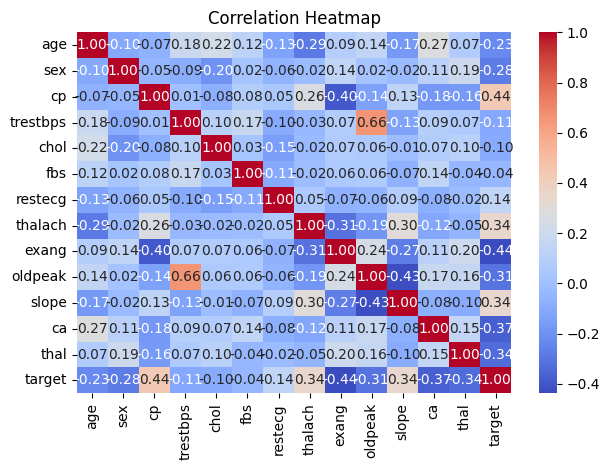

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 10})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

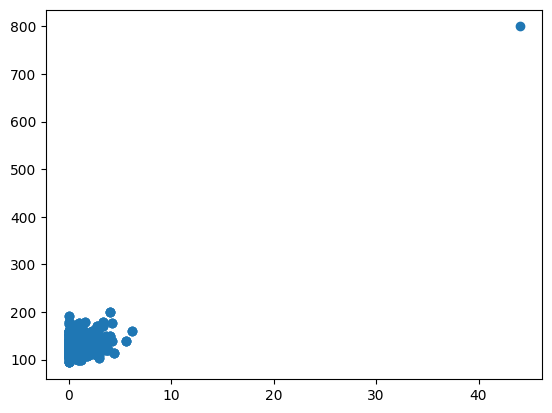

In [ ]:
plt.scatter(data.oldpeak, data.trestbps)
plt.show()

In [ ]:
threshold = 3
z_scores = np.abs((data[['oldpeak', 'trestbps']] - data[['oldpeak', 'trestbps']].mean()) / data[['oldpeak', 'trestbps']].std())
filtered_data = data[(z_scores < threshold).all(axis=1)]
print(filtered_data[['oldpeak', 'trestbps']].corr())

           oldpeak  trestbps
oldpeak   1.000000  0.192852
trestbps  0.192852  1.000000


<Axes: ylabel='age'>

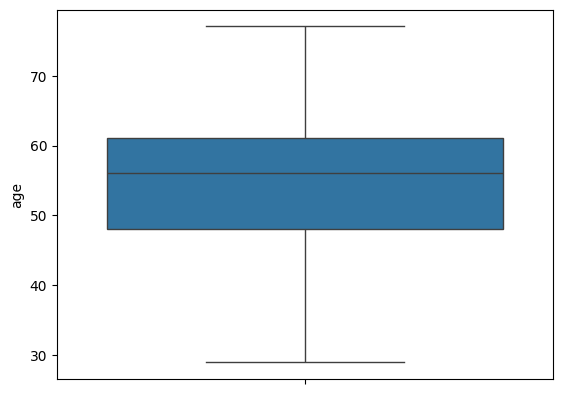

In [ ]:
sns.boxplot(data.age)

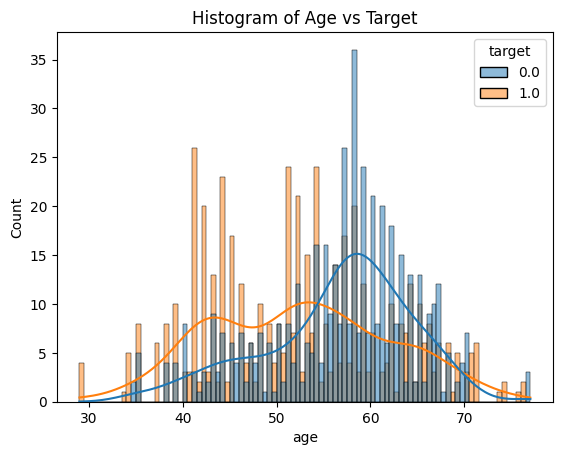

In [ ]:
sns.histplot(data=data, x='age', hue='target', kde=True, binwidth=0.5)
plt.title("Histogram of Age vs Target")
plt.show()

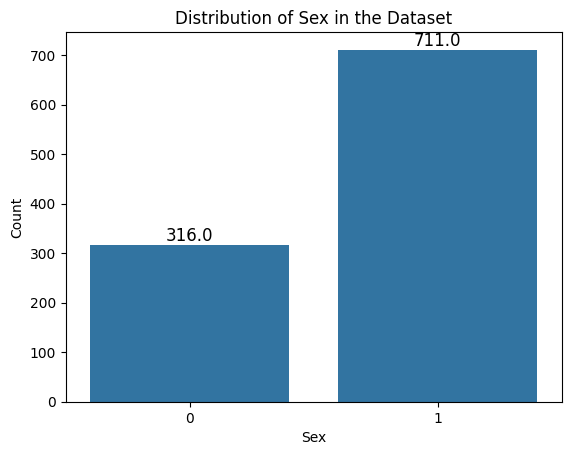

In [ ]:
plot = sns.countplot(x='sex', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in the Dataset')

plt.show()

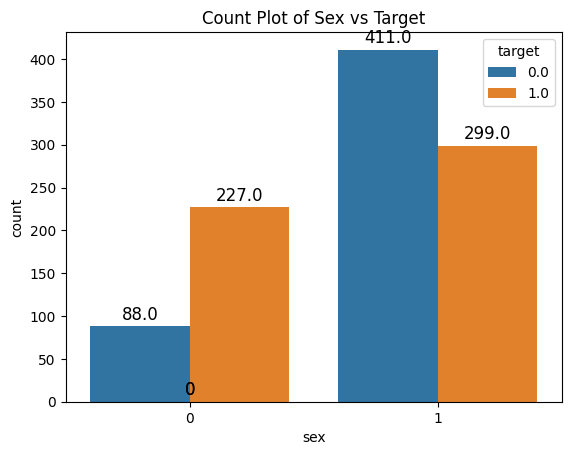

In [ ]:
plot = sns.countplot(x='sex', hue='target', data=data)
plt.title("Count Plot of Sex vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

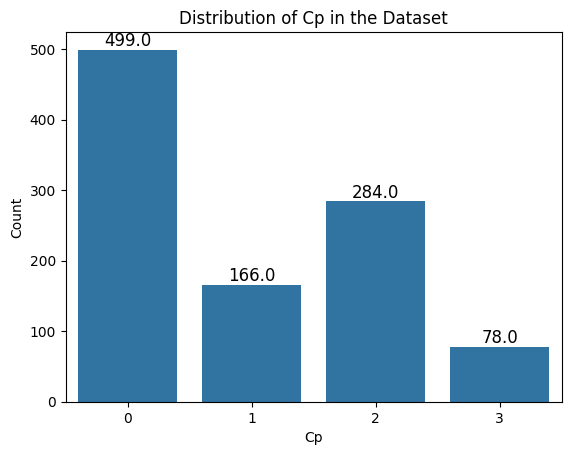

In [ ]:
plot = sns.countplot(x='cp', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Cp')
plt.ylabel('Count')
plt.title('Distribution of Cp in the Dataset')

plt.show()

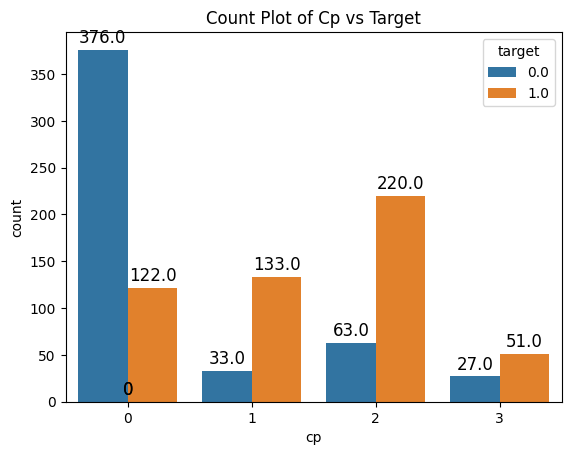

In [ ]:
plot = sns.countplot(x='cp', hue='target', data=data)
plt.title("Count Plot of Cp vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='trestbps'>

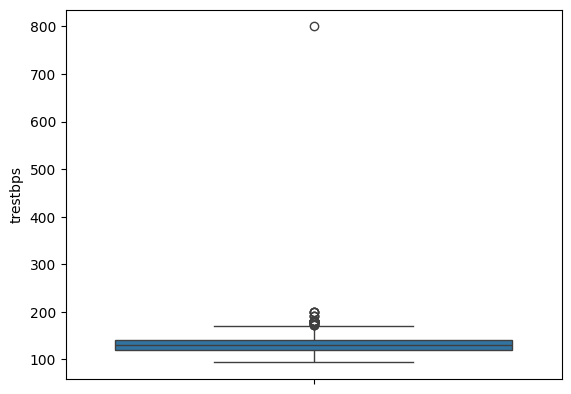

In [ ]:
sns.boxplot(data.trestbps)

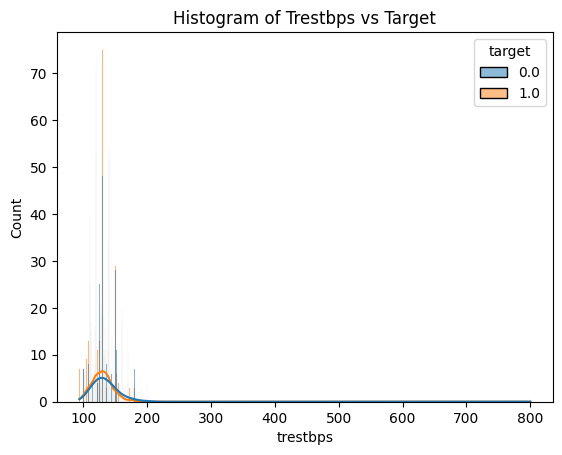

In [ ]:
sns.histplot(data=data, x='trestbps', hue='target', kde=True, binwidth=0.5)
plt.title("Histogram of Trestbps vs Target")
plt.show()

<Axes: ylabel='chol'>

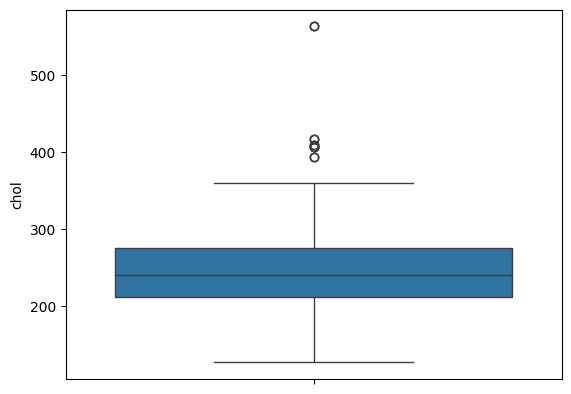

In [ ]:
sns.boxplot(data.chol)

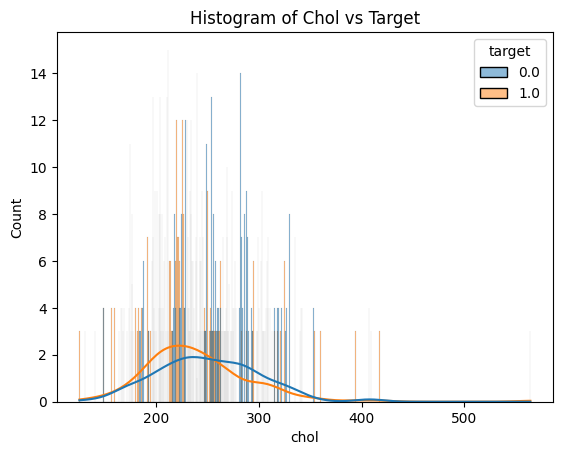

In [ ]:
sns.histplot(data=data, x='chol', hue='target', kde=True, binwidth=0.5)
plt.title("Histogram of Chol vs Target")
plt.show()

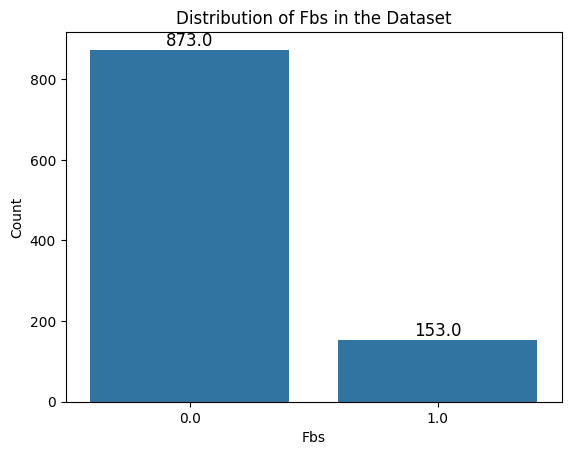

In [ ]:
plot = sns.countplot(x='fbs', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Fbs')
plt.ylabel('Count')
plt.title('Distribution of Fbs in the Dataset')

plt.show()

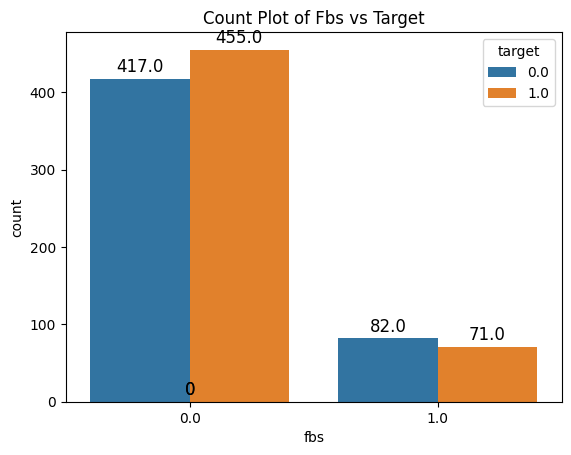

In [ ]:
plot = sns.countplot(x='fbs', hue='target', data=data)
plt.title("Count Plot of Fbs vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

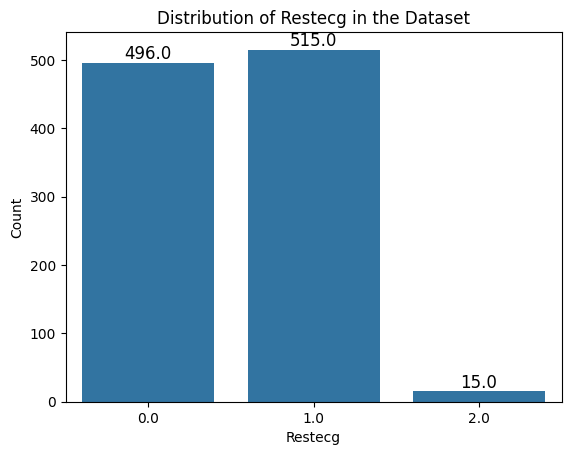

In [ ]:
plot = sns.countplot(x='restecg', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Restecg')
plt.ylabel('Count')
plt.title('Distribution of Restecg in the Dataset')

plt.show()

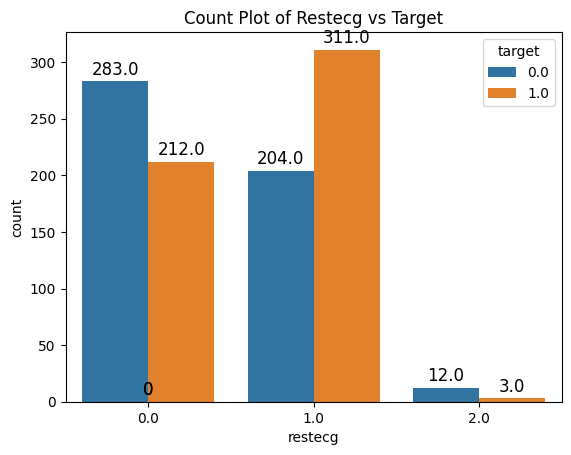

In [ ]:
plot = sns.countplot(x='restecg', hue='target', data=data)
plt.title("Count Plot of Restecg vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='thalach'>

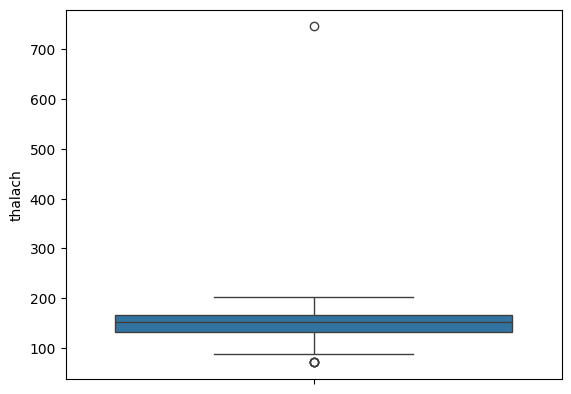

In [ ]:
sns.boxplot(data.thalach)

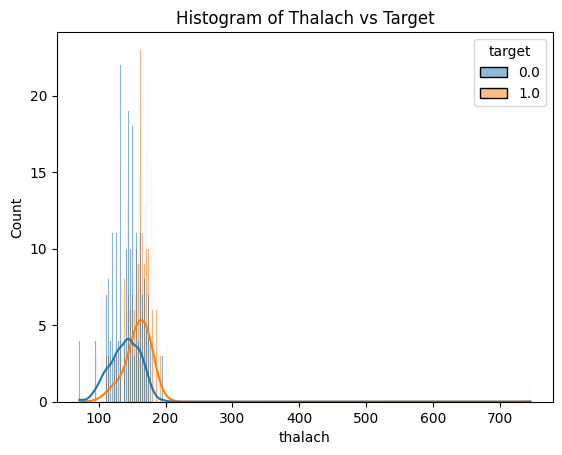

In [ ]:
sns.histplot(data=data, x='thalach', hue='target', kde=True, binwidth=0.5)
plt.title("Histogram of Thalach vs Target")
plt.show()

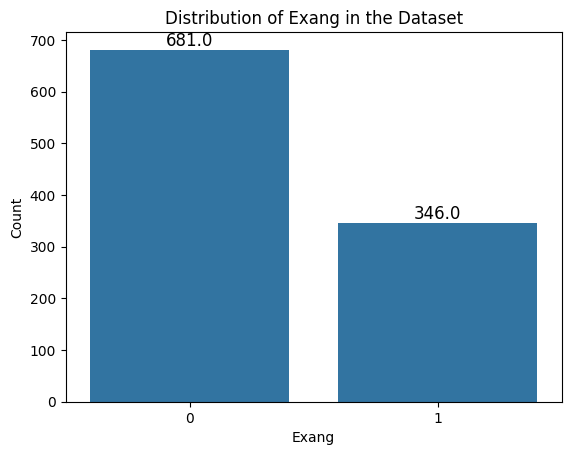

In [ ]:
plot = sns.countplot(x='exang', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Exang')
plt.ylabel('Count')
plt.title('Distribution of Exang in the Dataset')

plt.show()

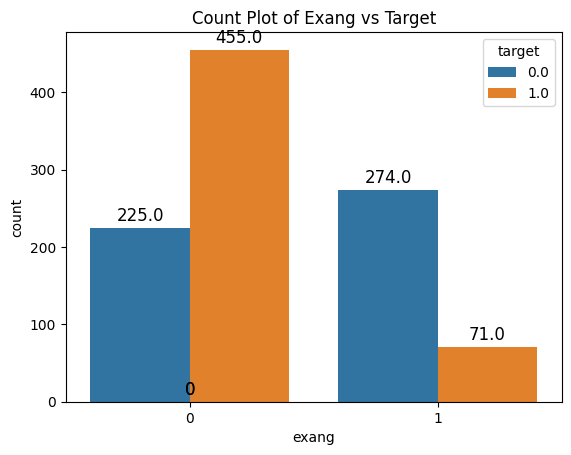

In [ ]:
plot = sns.countplot(x='exang', hue='target', data=data)
plt.title("Count Plot of Exang vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<Axes: ylabel='oldpeak'>

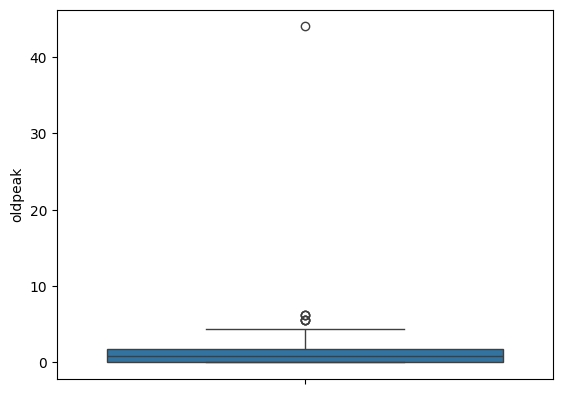

In [ ]:
sns.boxplot(data.oldpeak)

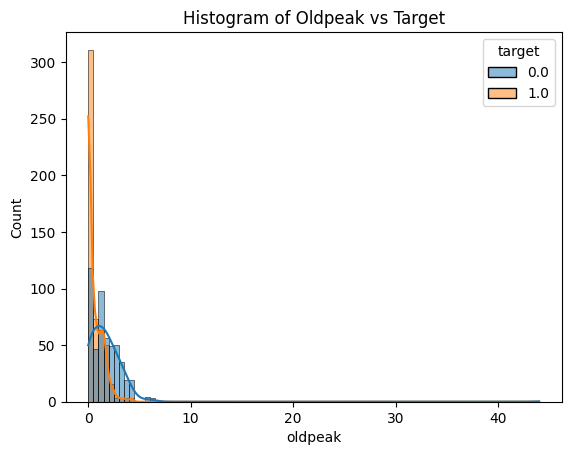

In [ ]:
sns.histplot(data=data, x='oldpeak', hue='target', kde=True, binwidth=0.5)
plt.title("Histogram of Oldpeak vs Target")
plt.show()

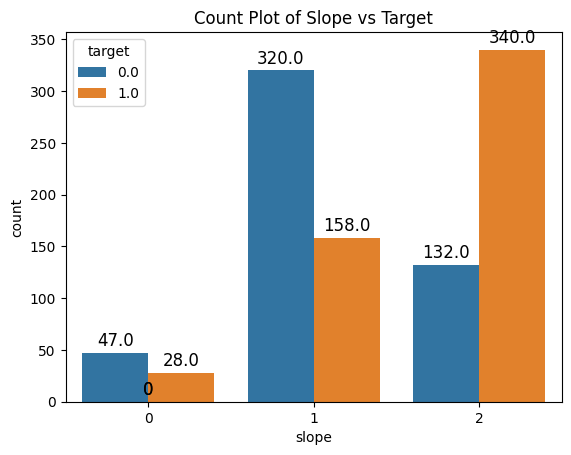

In [ ]:
plot = sns.countplot(x='slope', hue='target', data=data)
plt.title("Count Plot of Slope vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

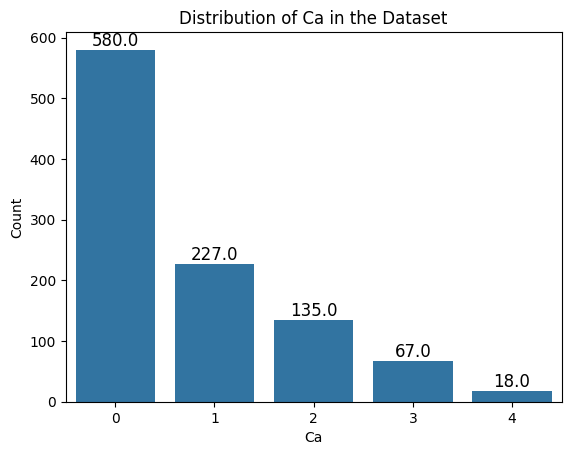

In [ ]:
plot = sns.countplot(x='ca', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Ca')
plt.ylabel('Count')
plt.title('Distribution of Ca in the Dataset')

plt.show()

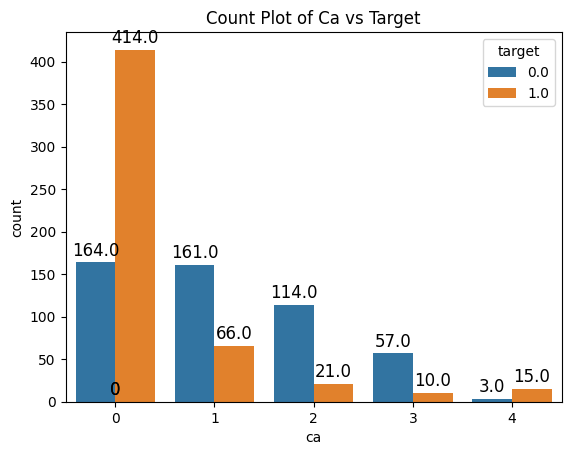

In [ ]:
plot = sns.countplot(x='ca', hue='target',data=data)
plt.title("Count Plot of Ca vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

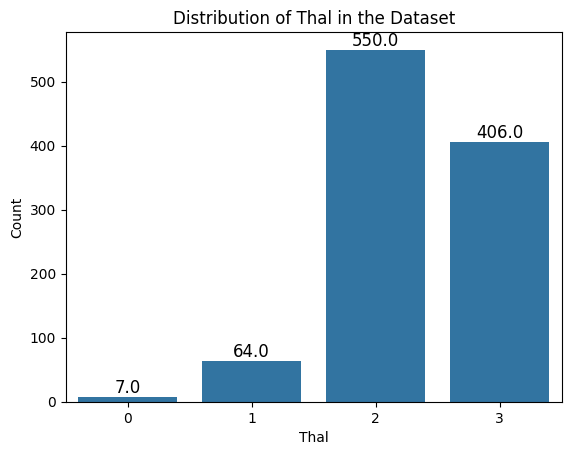

In [ ]:
plot = sns.countplot(x='thal', data=data)

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Thal')
plt.ylabel('Count')
plt.title('Distribution of Thal in the Dataset')

plt.show()

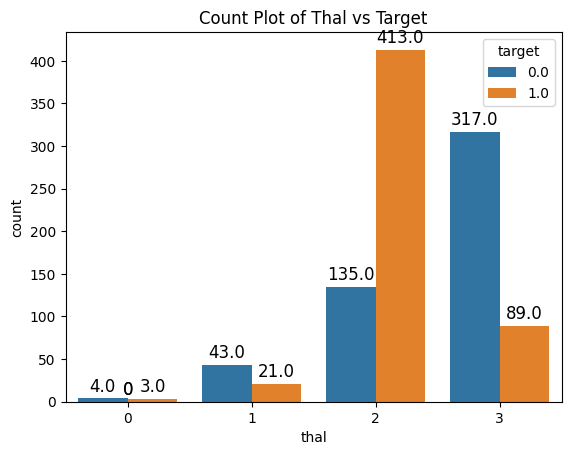

In [ ]:
plot = sns.countplot(x='thal', hue='target', data=data)
plt.title("Count Plot of Thal vs Target")

# Add counts on bars
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print(f"Training set: {train_data.shape}, Validation set: {valid_data.shape}, Test set: {test_data.shape}")

Training set: (821, 14), Validation set: (103, 14), Test set: (103, 14)


In [ ]:
print(f"Number of null values for training set:\n{train_data.isnull().sum()}")
print(f"Number of null values for validation set:\n{valid_data.isnull().sum()}")
print(f"Number of null values for testing set:\n{test_data.isnull().sum()}")

Number of null values for training set:
age         2
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64
Number of null values for validation set:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         1
restecg     1
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      2
dtype: int64
Number of null values for testing set:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
duplicate_rows = train_data[train_data.duplicated()]
print(duplicate_rows)

      age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
375  67.0    1   0       120  237.0  0.0      1.0     71.0      0      1.0   
104  47.0    1   0       110  275.0  0.0      0.0    118.0      1      1.0   
364  48.0    1   1       110  229.0  0.0      1.0    168.0      0      1.0   
267  43.0    1   0       110  211.0  0.0      1.0    161.0      0      0.0   
886  61.0    1   0       120  260.0  0.0      1.0    140.0      1      3.6   
251  35.0    1   0       120  198.0  0.0      1.0    130.0      1      1.6   

     slope  ca  thal  target  
375      1   0     2     0.0  
104      1   1     2     0.0  
364      0   0     3     0.0  
267      2   0     3     1.0  
886      1   1     3     0.0  
251      1   0     3     0.0  


In [ ]:
train_data = train_data.drop_duplicates()

In [ ]:
duplicate_rows = valid_data[valid_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [ ]:
duplicate_rows = test_data[test_data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [ ]:
target_column = "target"
valid_data = valid_data.dropna(subset=[target_column])
print(f"Number of null values for valid set:\n{valid_data.isnull().sum()}")

Number of null values for valid set:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

features = ['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
target_columns = ['age', 'chol', 'thalach', 'oldpeak']

for value in target_columns:
    if train_data[value].isnull().sum() > 0:

        full_features = features + [col for col in target_columns if col != value]

        known_data = train_data[train_data[value].notnull()]
        missing_data = train_data[train_data[value].isnull()]

        x_known = known_data[full_features]
        y_known = known_data[value]

        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(x_known, y_known)

        x_missing = missing_data[full_features]
        predicted_values = rf.predict(x_missing)

        train_data.loc[train_data[value].isnull(), value] = predicted_values

print(f"Number of null values for training set:\n{train_data.isnull().sum()}")

Number of null values for training set:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#Detect the outliers using Z-score
#Only numeric columns are standardized (age, trestbps, chol, restecg, oldpeak)

In [ ]:
from scipy import stats

# Function to detect and cap outliers
def outlierHandler(dataset, setname, train_mean=None, train_std=None):
    print(f"\n{setname} dataset outlier rows:")

    # Select only numerical columns
    num_cols = dataset.select_dtypes(include="float64").columns

     # Compute Z-scores
    z_scores = np.abs(stats.zscore(dataset[num_cols]))

    # Find rows where any column has |z-score| > 3
    outlier_idx = dataset.loc[(z_scores > 3).any(axis=1)].index

    # Display the outlier rows
    display(dataset.loc[outlier_idx])
    print("")

    # If train_mean and train_std are provided, use them for capping
    if train_mean is not None and train_std is not None:
        for col in num_cols:
            # Calculate upper and lower limits using training data's mean and std
            upper_limit = train_mean[col] + 3 * train_std[col]
            lower_limit = train_mean[col] - 3 * train_std[col]

            # Cap the outliers in the dataset
            dataset[col] = np.where(
                dataset[col] > upper_limit, upper_limit,
                np.where(dataset[col] < lower_limit, lower_limit, dataset[col])
            )
    else:
        # If train_mean and train_std are not provided, calculate limits from the current dataset
        for col in num_cols:
            # Calculate upper and lower limits for the current dataset
            upper_limit = dataset[col].mean() + 3 * dataset[col].std()
            lower_limit = dataset[col].mean() - 3 * dataset[col].std()

            # Cap the outliers in the dataset
            dataset[col] = np.where(
                dataset[col] > upper_limit, upper_limit,
                np.where(dataset[col] < lower_limit, lower_limit, dataset[col])
            )

    return dataset

In [ ]:
# Separate variables and target for each split
x_train = train_data.drop('target', axis = 1)
y_train = train_data['target']

x_valid = valid_data.drop('target', axis = 1)
y_valid = valid_data['target']

x_test = test_data.drop('target', axis = 1)
y_test = test_data['target']

In [ ]:
# Numerical columns to process
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Compute train mean and std before standardization
train_mean = x_train.mean()
train_std = x_train.std()

# Cap Outliers
x_train_capped = outlierHandler(x_train.copy(), "Training", train_mean=train_mean, train_std=train_std)
x_valid_capped = outlierHandler(x_valid.copy(), "Validation", train_mean=train_mean, train_std=train_std)
x_test_capped = outlierHandler(x_test.copy(), "Test", train_mean=train_mean, train_std=train_std)


Training dataset outlier rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
448,63.0449,0,0,150,407.0,0.0,0.0,154.0,0,4.0,1,3,3
664,65.0665,0,2,140,417.0,1.0,0.0,157.0,0,0.8,2,1,2
534,62.0535,1,2,130,231.0,0.0,1.0,746.0,0,1.8,1,3,3
177,56.0178,0,0,134,409.0,0.0,0.0,150.0,1,1.9,1,2,3
889,63.0890,0,0,150,407.0,0.0,0.0,154.0,0,4.0,1,3,3
958,65.0959,0,2,140,417.0,1.0,0.0,157.0,0,0.8,2,1,2
478,63.0479,0,0,150,407.0,0.0,0.0,154.0,0,4.0,1,3,3
190,67.0191,0,2,115,564.0,0.0,0.0,160.0,0,1.6,1,0,3
684,63.0685,0,0,150,407.0,0.0,0.0,154.0,0,4.0,1,3,3
640,56.0641,0,0,134,409.0,0.0,0.0,150.0,1,1.9,1,2,3




Validation dataset outlier rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal




Test dataset outlier rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
54,55.0055,1,0,140,217.0,0.0,1.0,111.0,1,5.6,0,0,3


In [ ]:
#Scale the data
from sklearn import preprocessing

scaler1 = preprocessing.MinMaxScaler()
nor_x_train = scaler1.fit_transform(x_train_capped)
nor_x_valid = scaler1.transform(x_valid_capped)
nor_x_test = scaler1.transform(x_test_capped)

In [ ]:
scaler2 = StandardScaler()
std_x_train = scaler2.fit_transform(x_train_capped)
std_x_valid = scaler2.transform(x_valid_capped)
std_x_test = scaler2.transform(x_test_capped)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

model1 = linear_model.LogisticRegression()
model1.fit(nor_x_train,y_train)
y_pred1 = model1.predict(nor_x_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy for normalization: {accuracy1:.2f}")

model2=linear_model.LogisticRegression()
model2.fit(std_x_train, y_train)
y_pred2 = model2.predict(std_x_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy for standardization: {accuracy2:.2f}")


Accuracy for normalization: 0.88
Accuracy for standardization: 0.86


In [ ]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler1, scaler_filename)

['scaler.save']

In [ ]:
pd.DataFrame(nor_x_train).to_csv("x_train.csv")
pd.DataFrame(nor_x_valid).to_csv("x_valid.csv")
pd.DataFrame(nor_x_test).to_csv("x_test.csv")

y_train.to_csv("y_train.csv")
y_valid.to_csv("y_valid.csv")
y_test.to_csv("y_test.csv")

In [ ]:
new_data=pd.read_csv("/content/HeartNewPatients.csv")

actual_target = new_data['target']
X_new = new_data.drop('target', axis=1)
X_new = scaler1.transform(X_new)

pd.DataFrame(X_new).to_csv("x_new.csv")
actual_target.to_csv("y_actual.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/HeartNewPatients.csv'